In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.vq import vq, kmeans, kmeans2, whiten

%matplotlib inline

### Подготовка набора данных

In [19]:
def convert_to_float(value):
    """
    Преобразование значений в столбцах датафрейма;
    :param value: float
    :return: float
    """
    value = str(value)
    value = value.replace(",", ".")
    value = round(float(value), 2)
    return value

#######################################################################################################################

In [84]:
# Загрузка датафрейма из CSV файла;
textiles = pd.read_csv('../dataframe.csv')

# Приведение типов колонок датафрейма к значению с плавающей запятой;
textiles['warp_a'] = textiles.warp_a.apply(convert_to_float)
textiles['warp_b'] = textiles.warp_b.apply(convert_to_float)
textiles['weft_a'] = textiles.weft_a.apply(convert_to_float)
textiles['weft_b'] = textiles.weft_b.apply(convert_to_float)

# Вычисление "усредненных" толщин нитей;
textiles['warp_nominal'] = round((textiles['warp_a'] + textiles['warp_b']) / 2, 2)
textiles['weft_nominal'] = round((textiles['weft_a'] + textiles['weft_b']) / 2, 2)

FileNotFoundError: [Errno 2] File b'../dataframe.csv' does not exist: b'../dataframe.csv'

### Иерархическая кластеризация

### Кластеризация методом k-средних

In [67]:
threads_whitened = whiten(list(zip(textiles['warp_nominal'].tolist(), textiles['weft_nominal'].tolist())))
threads_centroids, threads_labels = kmeans2(threads_whitened, 3)

[2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 0 1 1 2 2 2 2 2 1 2 1 1 2 1 2
 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 1 1 2 1 1 1 1 1 1 2 2 2 2 1 1 2 1 1 2
 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2
 1 2 1 1 1 2 2 2 0 2 2 1 2 2 1 2 2 2 2 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2
 2 2 1 2 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 2 1 2 2 1 1 2
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2
 2 1 1 1 1 1 1 1]


In [68]:
textiles['threads_labels'] = threads_labels

In [73]:
cluster_1 = textiles[textiles['threads_labels'] == 0]
cluster_2 = textiles[textiles['threads_labels'] == 1]
cluster_3 = textiles[textiles['threads_labels'] == 2]

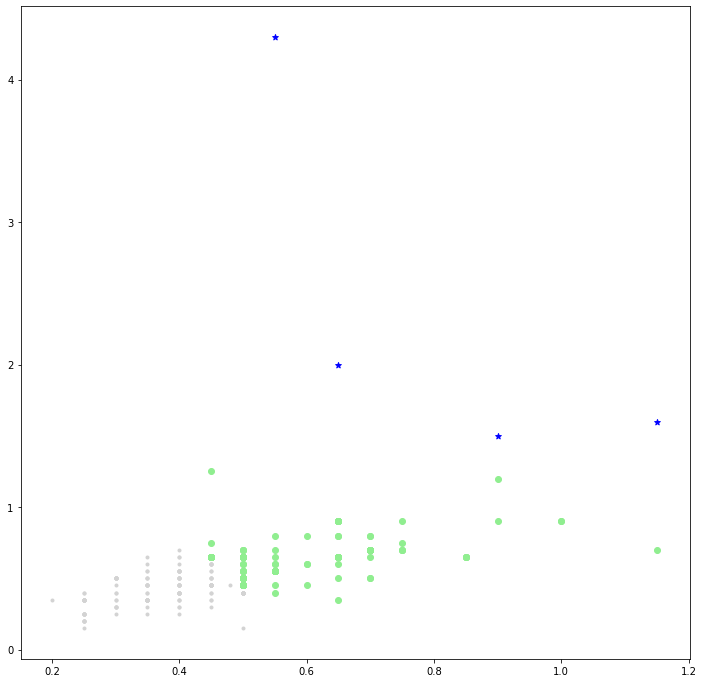

In [83]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(cluster_1['warp_nominal'].tolist(), cluster_1['weft_nominal'].tolist(), marker='*', color='blue')
ax.scatter(cluster_2['warp_nominal'].tolist(), cluster_2['weft_nominal'].tolist(), marker='.', color='lightgray')
ax.scatter(cluster_3['warp_nominal'].tolist(), cluster_3['weft_nominal'].tolist(), marker='o', color='lightgreen')

plt.show()